# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
%matplotlib inline

In [2]:
training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

The dataset contains 34799 training examples of German street signs with 43 different classes. The test set has a total of 12630 examples. The images have a dimension of 32x32 pixels and 3 colors. Below is a table of the labels mapped to sign names.

In [4]:
sign_names = pd.read_csv('signnames.csv', index_col='ClassId')
sign_names

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


5 examples for each of the 43 classes

Class ID: 0, Name: Speed limit (20km/h)


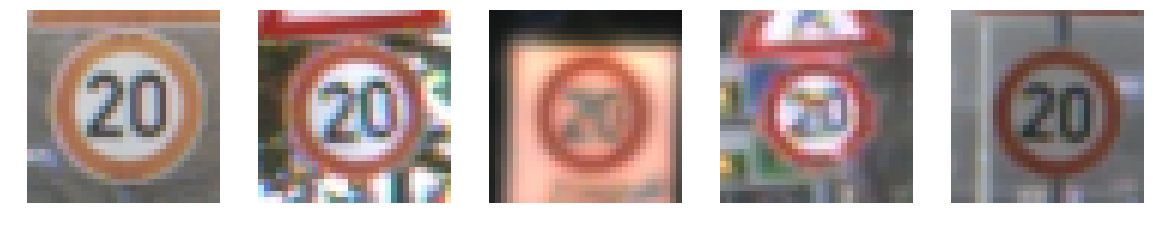

Class ID: 1, Name: Speed limit (30km/h)


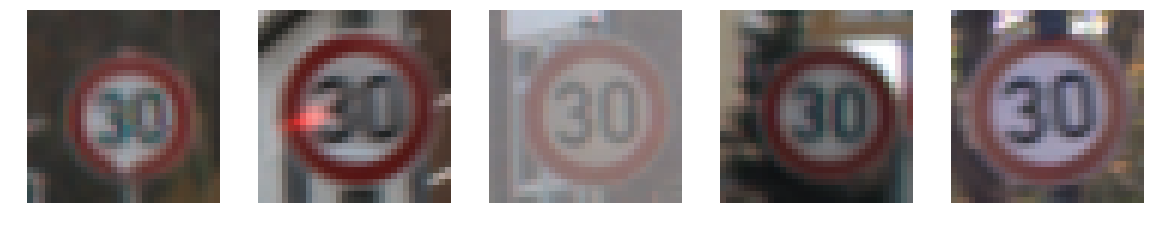

Class ID: 2, Name: Speed limit (50km/h)


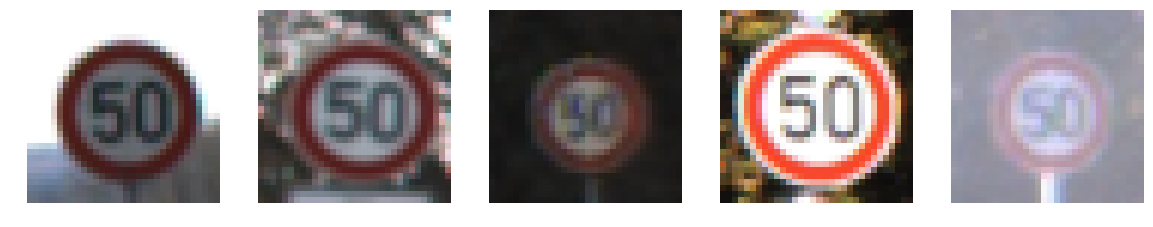

Class ID: 3, Name: Speed limit (60km/h)


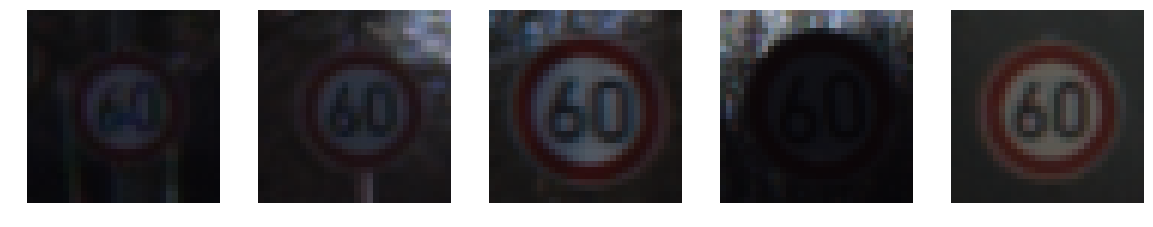

Class ID: 4, Name: Speed limit (70km/h)


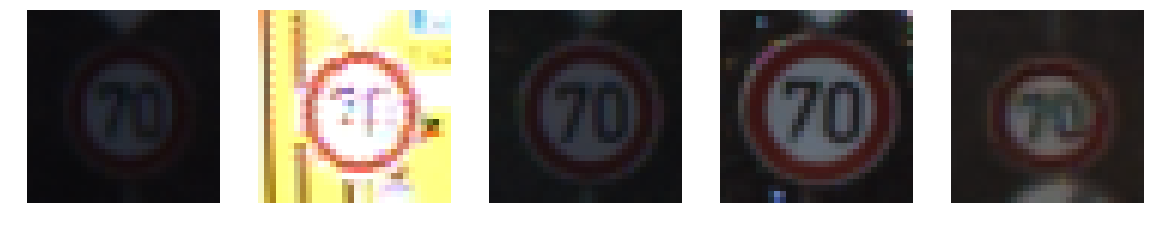

Class ID: 5, Name: Speed limit (80km/h)


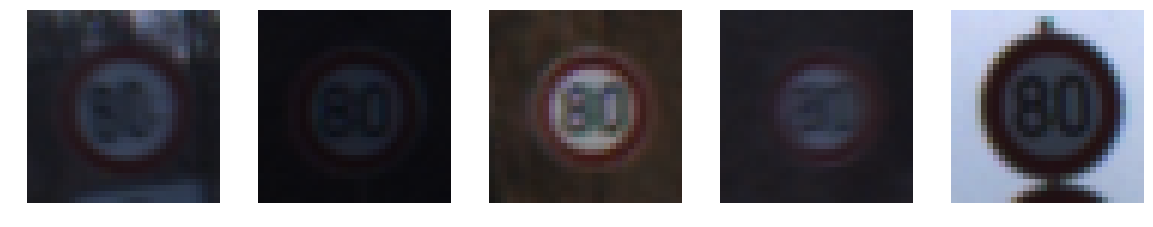

Class ID: 6, Name: End of speed limit (80km/h)


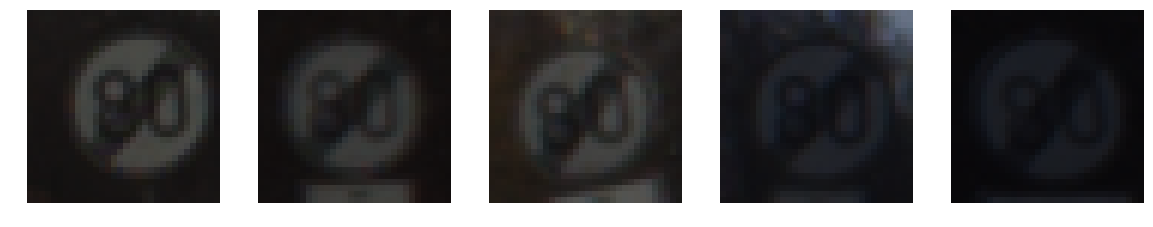

Class ID: 7, Name: Speed limit (100km/h)


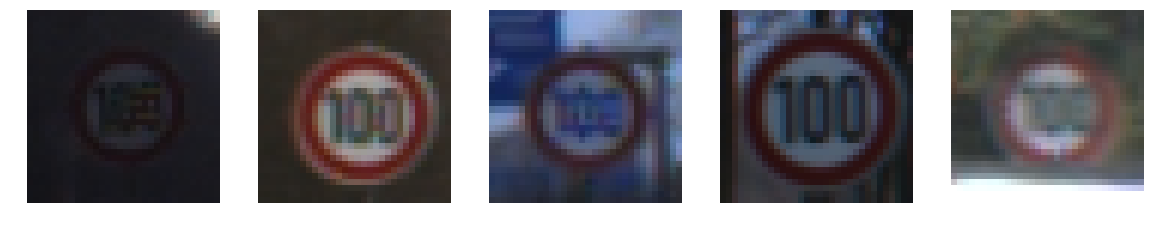

Class ID: 8, Name: Speed limit (120km/h)


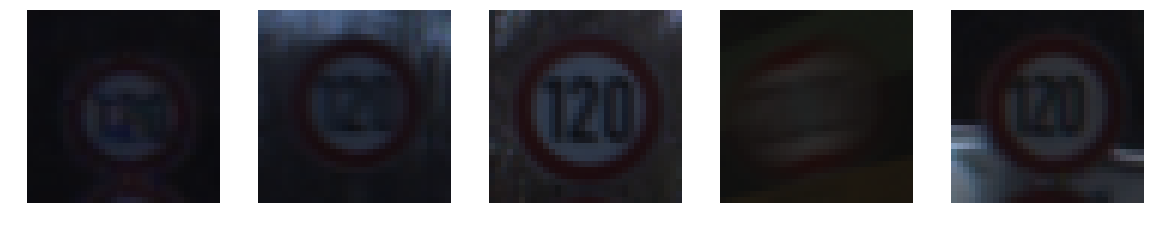

Class ID: 9, Name: No passing


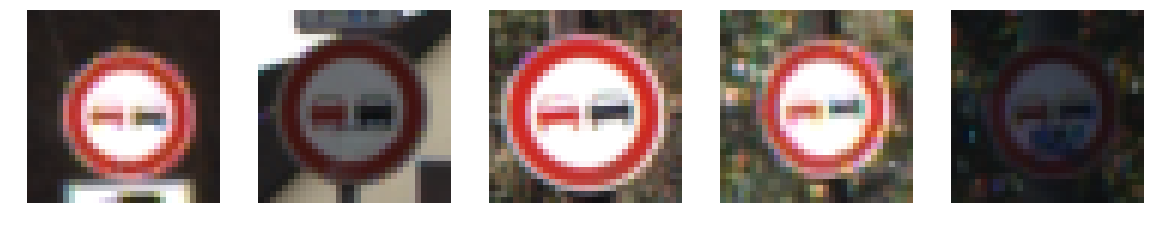

Class ID: 10, Name: No passing for vehicles over 3.5 metric tons


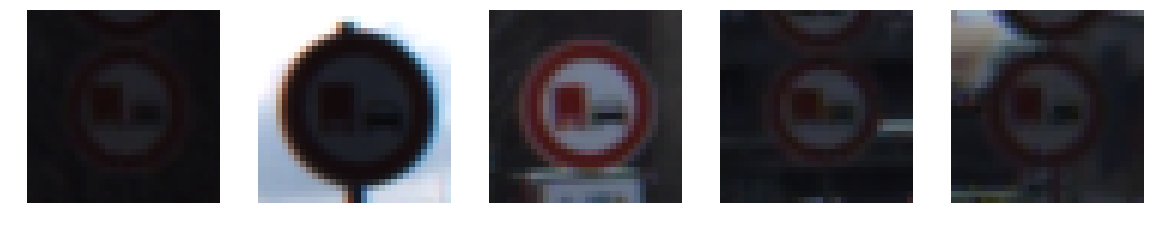

Class ID: 11, Name: Right-of-way at the next intersection


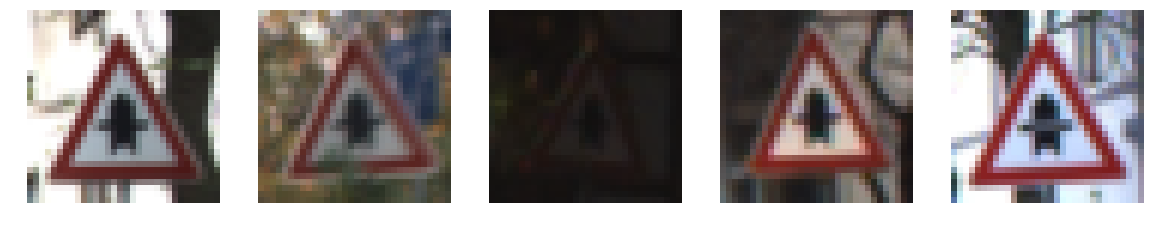

Class ID: 12, Name: Priority road


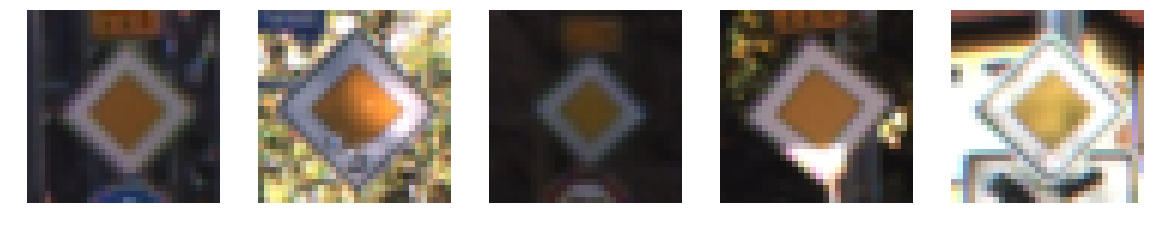

Class ID: 13, Name: Yield


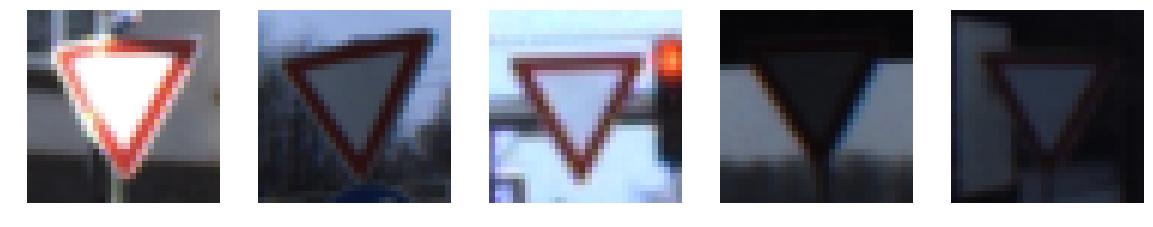

Class ID: 14, Name: Stop


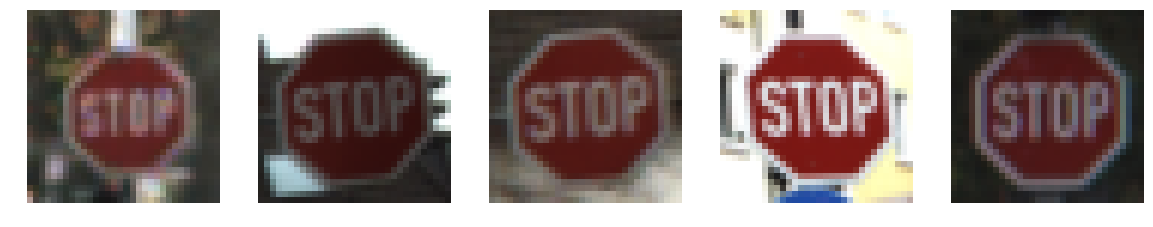

Class ID: 15, Name: No vehicles


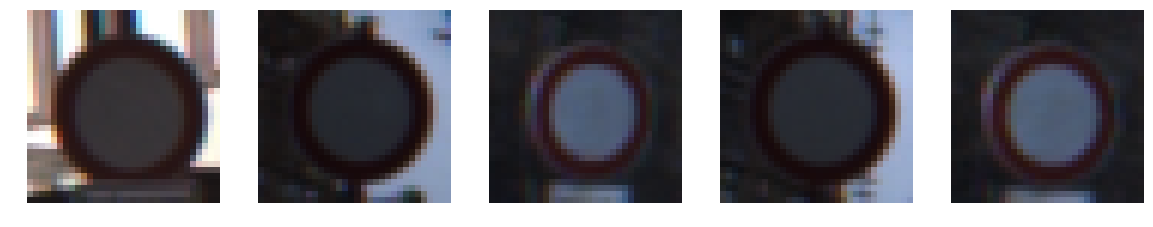

Class ID: 16, Name: Vehicles over 3.5 metric tons prohibited


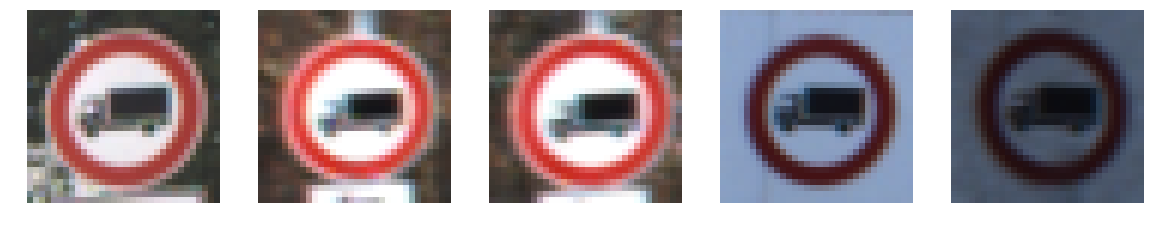

Class ID: 17, Name: No entry


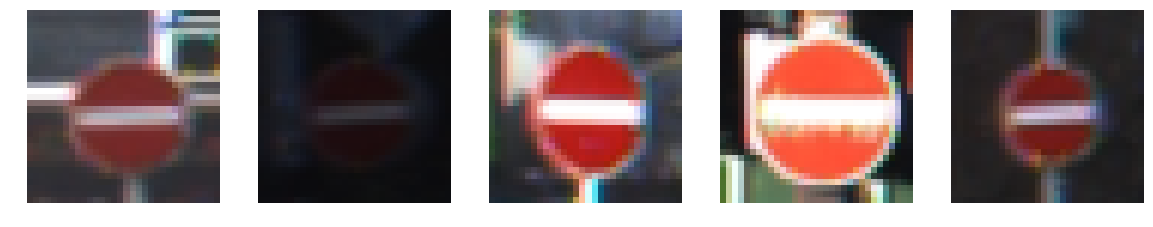

Class ID: 18, Name: General caution


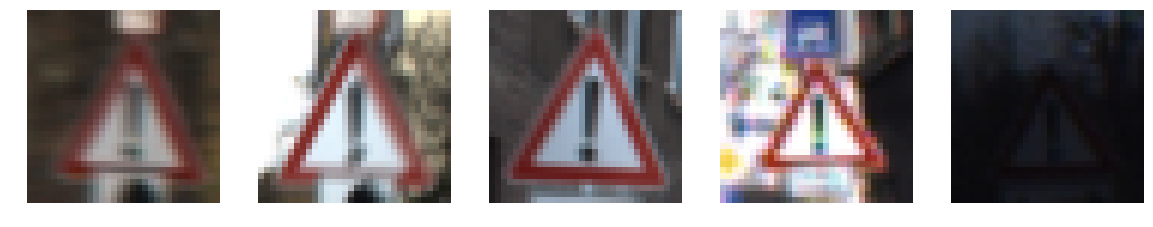

Class ID: 19, Name: Dangerous curve to the left


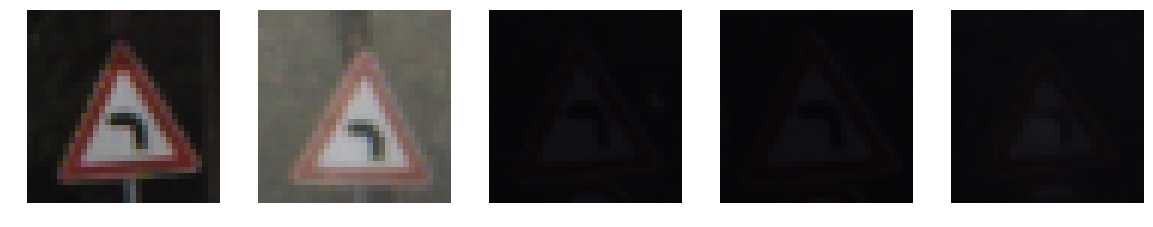

Class ID: 20, Name: Dangerous curve to the right


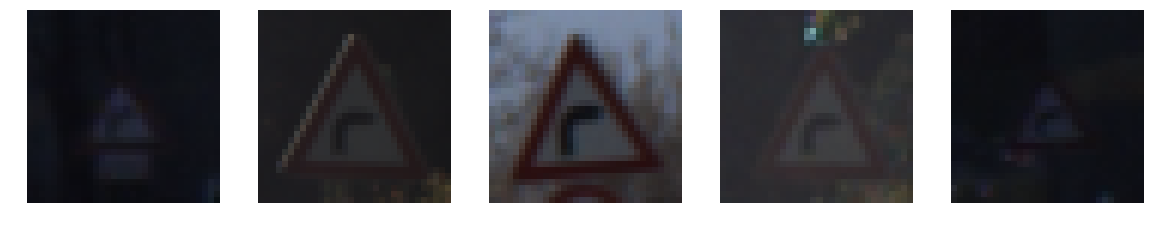

Class ID: 21, Name: Double curve


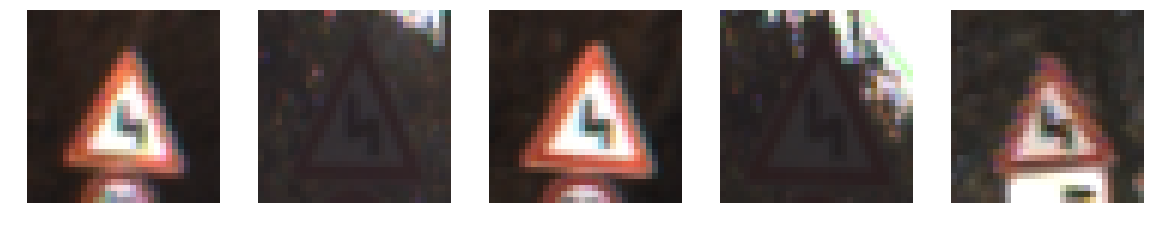

Class ID: 22, Name: Bumpy road


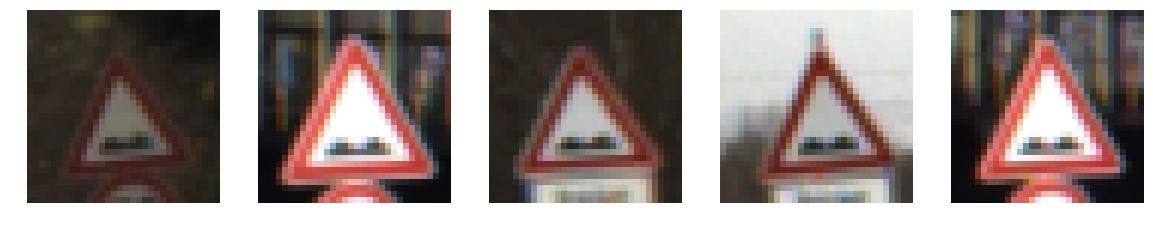

Class ID: 23, Name: Slippery road


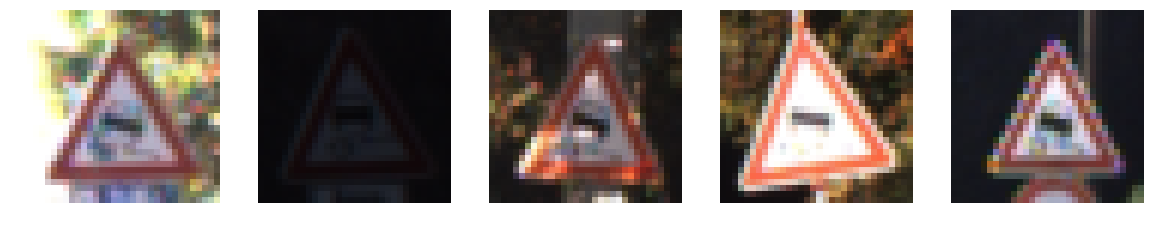

Class ID: 24, Name: Road narrows on the right


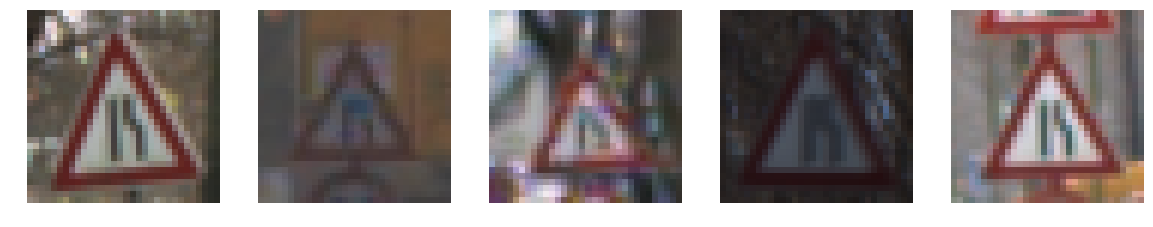

Class ID: 25, Name: Road work


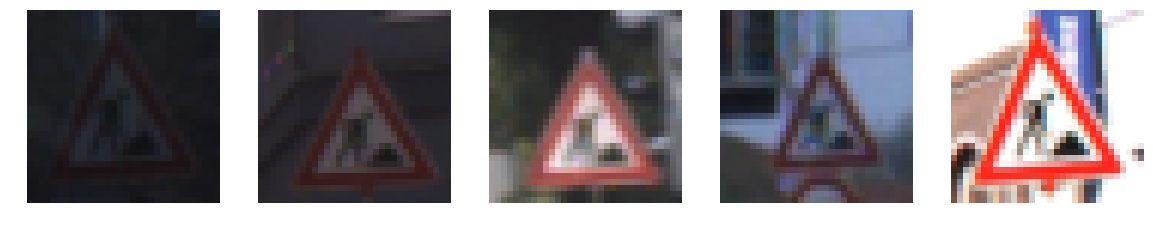

Class ID: 26, Name: Traffic signals


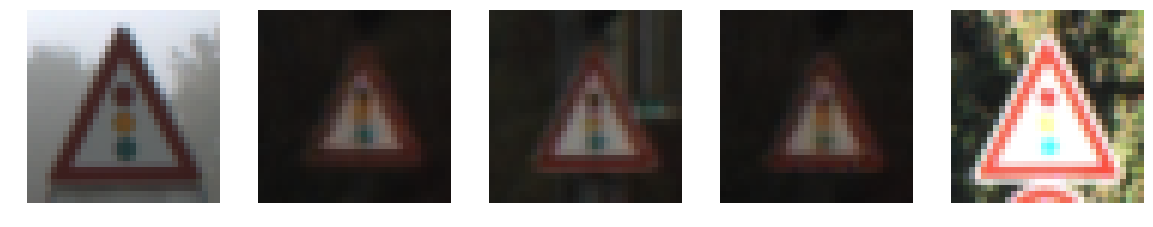

Class ID: 27, Name: Pedestrians


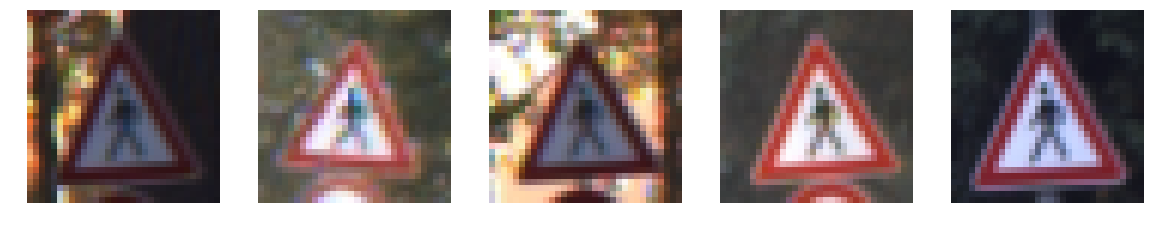

Class ID: 28, Name: Children crossing


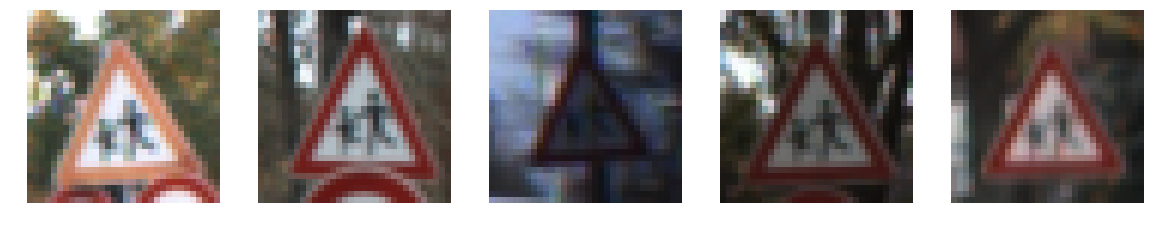

Class ID: 29, Name: Bicycles crossing


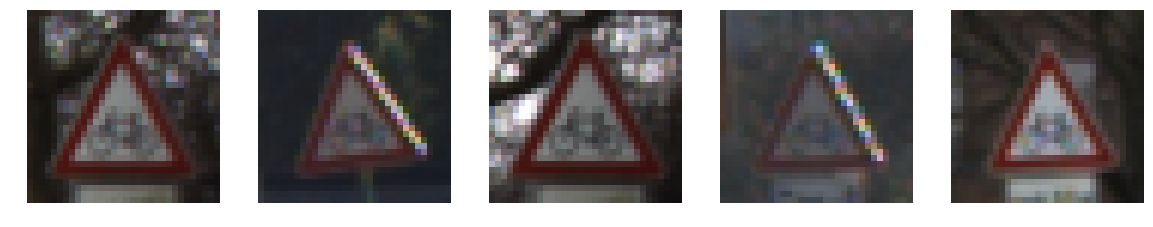

Class ID: 30, Name: Beware of ice/snow


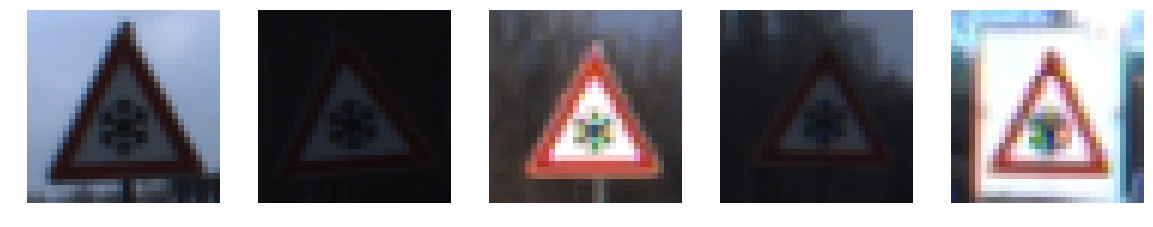

Class ID: 31, Name: Wild animals crossing


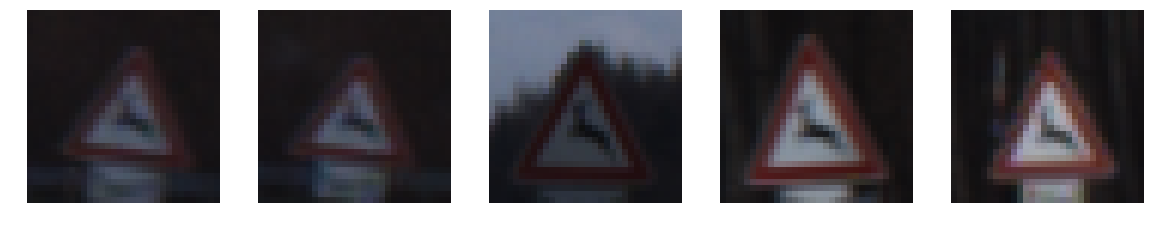

Class ID: 32, Name: End of all speed and passing limits


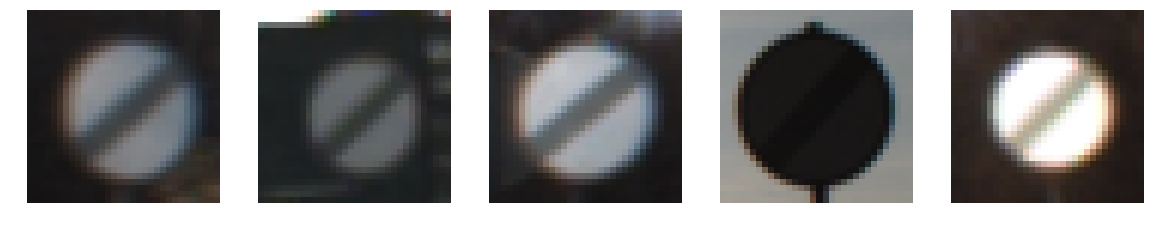

Class ID: 33, Name: Turn right ahead


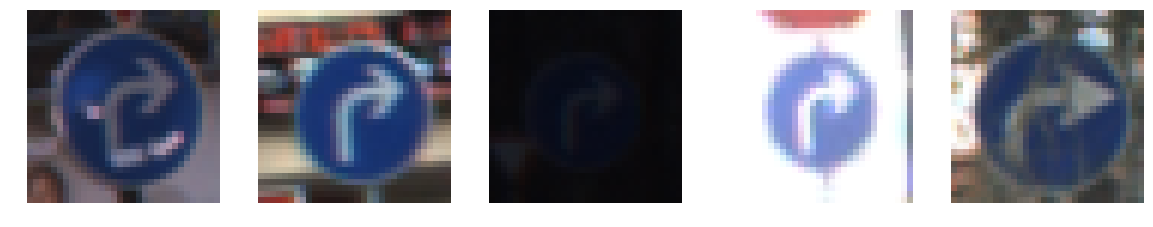

Class ID: 34, Name: Turn left ahead


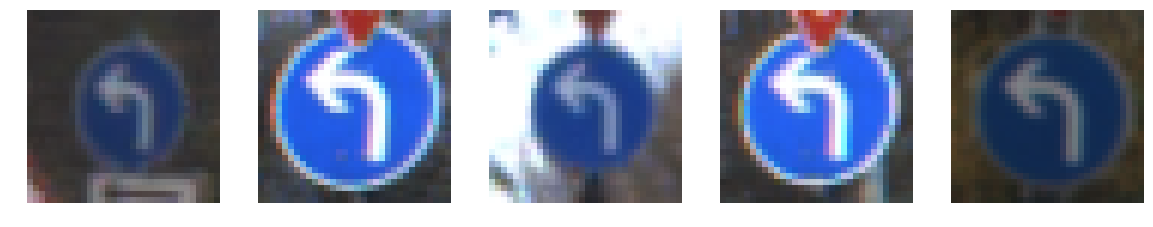

Class ID: 35, Name: Ahead only


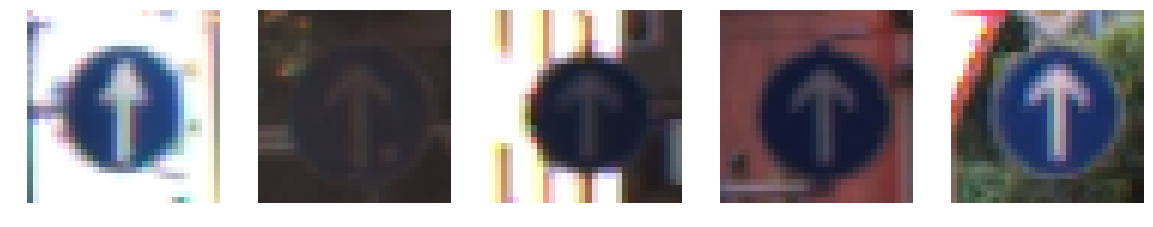

Class ID: 36, Name: Go straight or right


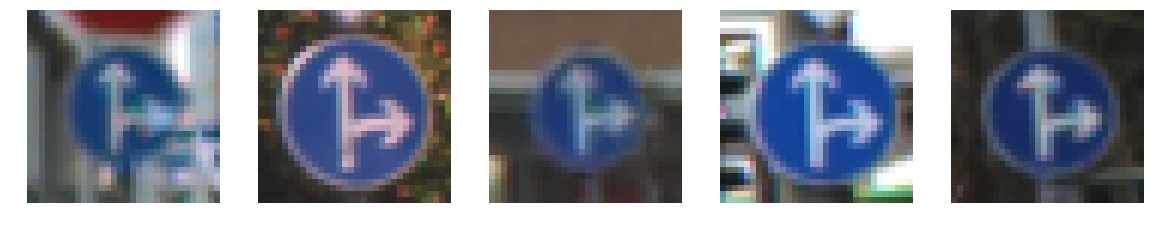

Class ID: 37, Name: Go straight or left


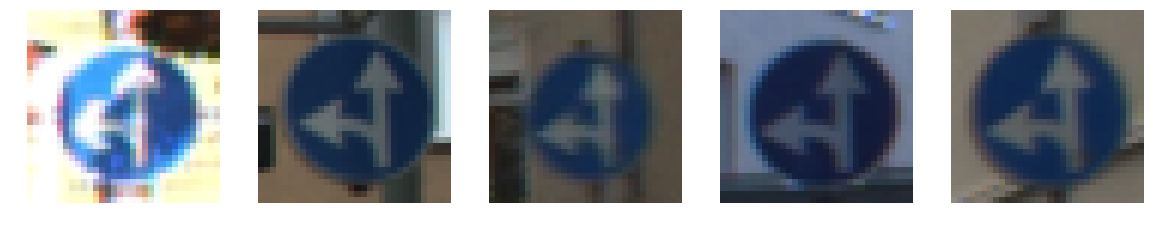

Class ID: 38, Name: Keep right


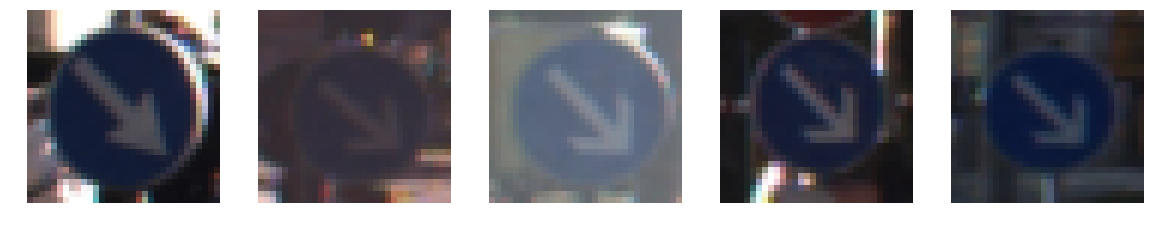

Class ID: 39, Name: Keep left


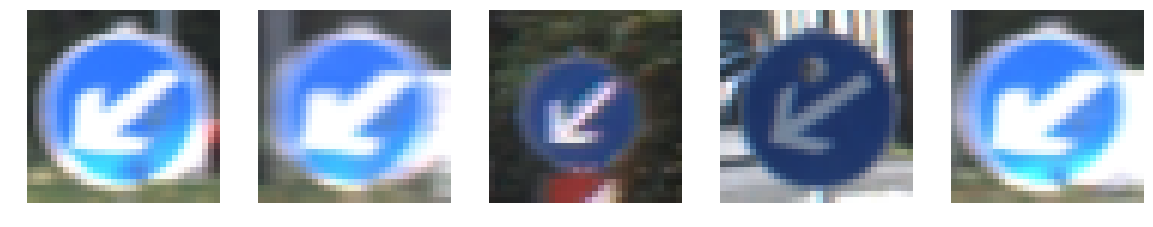

Class ID: 40, Name: Roundabout mandatory


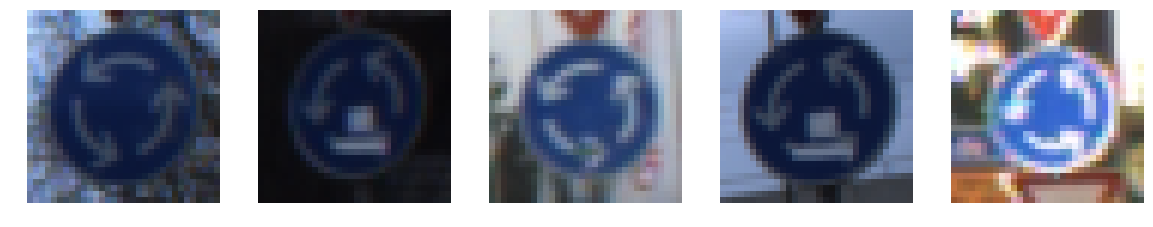

Class ID: 41, Name: End of no passing


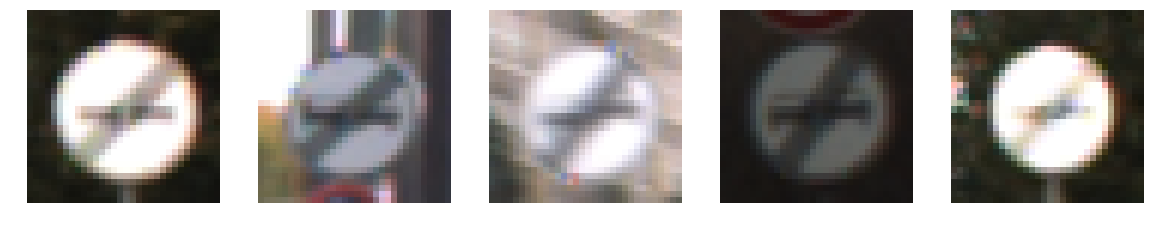

Class ID: 42, Name: End of no passing by vehicles over 3.5 metric tons


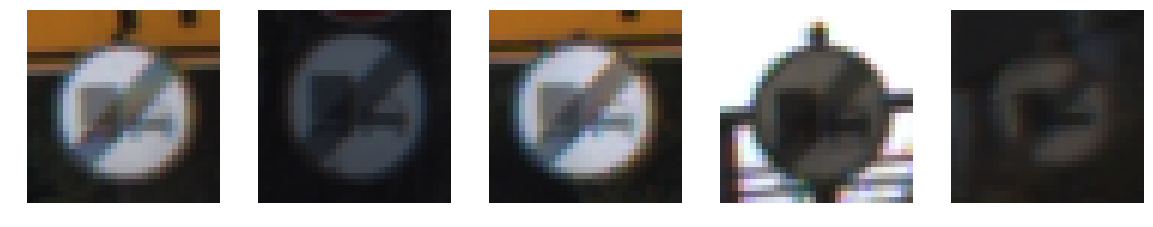

In [5]:
for i in sorted(set(y_train)):
    print("Class ID: {}, Name: {}".format(i, sign_names.iloc[i]['SignName']))
    X_train_, y_train_ = shuffle(X_train, y_train)
    f, ax = plt.subplots(1, 5, figsize=(20,10))
    for image, i in zip(X_train_[y_train_ == i], range(5)):
        ax[i].imshow(image)
        ax[i].set_axis_off()
    plt.show()

Distribution of classes in training set. Difference is quite high. Max occurrences is label 2 with 2010 examples, least common is label 0, 19 and 37 all with only 180 occurrences. So an order of magnitude difference between most and least common.

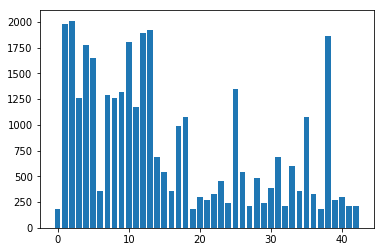

Counter({2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 18: 1080, 35: 1080, 17: 990, 14: 690, 31: 690, 33: 599, 15: 540, 26: 540, 28: 480, 23: 450, 30: 390, 6: 360, 16: 360, 34: 360, 22: 330, 36: 330, 20: 300, 40: 300, 21: 270, 39: 270, 24: 240, 29: 240, 27: 210, 32: 210, 41: 210, 42: 210, 0: 180, 19: 180, 37: 180})


In [6]:
from collections import Counter
label_count = Counter(y_train)
uniq_labels = sorted(set(y_train))
label_height = []
for i in uniq_labels:
    label_height.append(label_count[i])
plt.bar(uniq_labels, label_height)
plt.show()
print(label_count)

----

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

## Image pre-processing pipeline

First I convert the image to grayscale. I found that this worked well empirically, and also it is closer to the original LeNet architecture.
Then I add some modified (fake) training examples
- Rotated images 10 and 20 degrees clockwise and counter-clockwise
- Mirrored images
- Blurred images
- Noisy images

I do this to give the models more examples of each of the classes.
Lastly I normalize the data to get a (close to) zero mean

In [7]:
def convert_gray(X):
    X_ = []
    for x in X:
        X_.append(cv2.cvtColor(x, cv2.COLOR_RGB2GRAY))
    return np.array(X_)

def blur(X, y, kernel_size=5):
    X_ = []
    y_ = []
    for i in range(len(X)):
        X_.append(cv2.GaussianBlur(X[i], (kernel_size, kernel_size), 0))
        y_.append(y[i])
    return X_, y_

def rotate(X, y, angle=10):
    X_ = []
    y_ = []
    for i in range(len(X)):
        X_.append(sp.ndimage.interpolation.rotate(X[i], angle, reshape=False, mode='nearest'))
        y_.append(y[i])
    return X_, y_

def noise(X, y, mu=0, s=0.1):
    X_ = []
    y_ = []
    img_size = X.shape
    for i in range(len(X)):
        n = np.random.normal(mu, s, img_size[1]*img_size[2]).reshape(img_size[1:])
        X_.append(X[i]+n)
        y_.append(y[i])
    return X_, y_

def flip_x(X, y):
    X_ = []
    y_ = []
    for i in range(len(X)):
        X_.append(np.fliplr(X[i]))
        y_.append(y[i])
    return X_, y_

def normalize(x):
    return (np.float32(x)-128)/128

In [8]:
def extra_examples(X_train, y_train):
    X_extra = []
    y_extra = []

    X_extra_tmp, y_extra_tmp = rotate(X_train, y_train, 10)
    X_extra += X_extra_tmp
    y_extra += y_extra_tmp

    X_extra_tmp, y_extra_tmp = rotate(X_train, y_train, -10)
    X_extra += X_extra_tmp
    y_extra += y_extra_tmp

    X_extra_tmp, y_extra_tmp = rotate(X_train, y_train, 20)
    X_extra += X_extra_tmp
    y_extra += y_extra_tmp

    X_extra_tmp, y_extra_tmp = rotate(X_train, y_train, -20)
    X_extra += X_extra_tmp
    y_extra += y_extra_tmp

    X_extra_tmp, y_extra_tmp = noise(X_train, y_train)
    X_extra += X_extra_tmp
    y_extra += y_extra_tmp

    X_extra_tmp, y_extra_tmp = flip_x(X_train, y_train)
    X_extra += X_extra_tmp
    y_extra += y_extra_tmp

    X_extra_tmp, y_extra_tmp = blur(X_train, y_train)
    X_extra += X_extra_tmp
    y_extra += y_extra_tmp

    X_train = np.concatenate((X_train, X_extra), axis=0)
    y_train = np.concatenate((y_train, y_extra), axis=0)
    
    return X_train, y_train

In [9]:
def pipeline(X, y, extra=False):
    X = convert_gray(X)
    if extra:
        X, y = extra_examples(X, y)
    X = normalize(X)
    X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2], 1))
    return X, y

In [10]:
X_train, y_train = pipeline(X_train, y_train, extra=True)
X_valid, y_valid = pipeline(X_valid, y_valid)
X_test, y_test = pipeline(X_test, y_test)

In [11]:
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

The model architecture is the same as in the LeNet lab. I added dropout after the first fully connected layer with a dropout rate of 0.5. The weight initialization parameters mu and sigma in the LeNet architecture is set to 0 and 0.1. All layers have a ReLU activation function except the last one which uses Softmax.

The layers of the architecture:

- Convolutional layer, 5x5 filter, input depth 1, output depth 6
- Max Pooling, 2x2 kernel, 2x2 stride
- Convolutional layer, 5x5 filter, input depth 6, output depth 16
- Max pooling 2x2 kernel, 2x2 stride
- Flatten
- Fully connected layer, 120 width
- Dropout, keep probability 0.5
- Fully connected layer, 84 width
- Fully connected layer, 43 width

More information about each layer can be seen below


In [12]:
EPOCHS = 40
BATCH_SIZE = 128

In [13]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # DROPOUT    ####
    keep_prob = tf.placeholder(tf.float32)
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1_drop, fc2_W) + fc2_b   ####
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, keep_prob

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

The Adam optimizer is used when training the network. The learning rate is set to 0.001. I run 40 epochs with a batch size of 128.

In [15]:
rate = 0.001

logits, keep_prob = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Evaluate model

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        test_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Test Accuracy = 0.919
Validation Accuracy = 0.903

EPOCH 2 ...
Test Accuracy = 0.956
Validation Accuracy = 0.936

EPOCH 3 ...
Test Accuracy = 0.967
Validation Accuracy = 0.940

EPOCH 4 ...
Test Accuracy = 0.975
Validation Accuracy = 0.950

EPOCH 5 ...
Test Accuracy = 0.980
Validation Accuracy = 0.958

EPOCH 6 ...
Test Accuracy = 0.983
Validation Accuracy = 0.959

EPOCH 7 ...
Test Accuracy = 0.984
Validation Accuracy = 0.961

EPOCH 8 ...
Test Accuracy = 0.984
Validation Accuracy = 0.954

EPOCH 9 ...
Test Accuracy = 0.986
Validation Accuracy = 0.956

EPOCH 10 ...
Test Accuracy = 0.987
Validation Accuracy = 0.961

EPOCH 11 ...
Test Accuracy = 0.988
Validation Accuracy = 0.961

EPOCH 12 ...
Test Accuracy = 0.987
Validation Accuracy = 0.954

EPOCH 13 ...
Test Accuracy = 0.990
Validation Accuracy = 0.956

EPOCH 14 ...
Test Accuracy = 0.989
Validation Accuracy = 0.961

EPOCH 15 ...
Test Accuracy = 0.988
Validation Accuracy = 0.956

EPOCH 16 ...
Test Accuracy = 0.991
V

### Accuracy on test set

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')
    train_accuracy = evaluate(X_train, y_train)
    validation_accuracy = evaluate(X_valid, y_valid)
    test_accuracy = evaluate(X_test, y_test)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 0.995
Validation Accuracy = 0.965
Test Accuracy = 0.938



## Solution approach

Training is run for `EPOCHS` epochs. In this case 40. In each epoch the training data is split into batch sizes with `BATCH_SIZE` in each. We use batches so we don't run into memory issues.

The model is trained by optimizing for the minimum cross entropy between the one hot encoding and the logits using the Adam optimizer.

After training is done the model is saved and the accuracy printed.

I think the LeNet architecture works well because the tasks are quite similar. We are trying to recognize symbols that are cropped and resized to a standard size. Traffic signs of the same class are usually identical, and even with noise and blur they are easy to recognize.

---

## Step 3: Test a Model on New Images

### Load and Output the Images

These images were taken from Google street view in two German cities. They are all clearly visible, under great lightning conditions, with only one sign visible. The images are taken facing the sign, as opposed to from the side. These are all optimal conditions where the new images are very similar to the training examples. I don't expect the model to have a lot of difficulties in correctly classifying the images.

In [19]:
def resize(image):
    return cv2.resize(image, (32, 32))

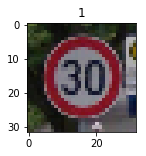

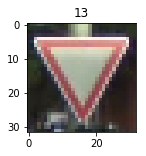

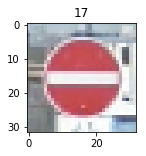

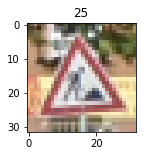

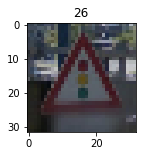

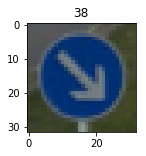

In [20]:
wild = []
wild_filenames = [1, 13, 17, 25, 26, 38]
y_wild = wild_filenames
folder = 'wild'
for filename in wild_filenames:
    path = '{}/{}.jpg'.format(folder, filename)
    image = mpimg.imread(path)
    image_32 = resize(image)
    wild.append(image_32)
    f, ax = plt.subplots(1, 1, figsize=(2,2))
    ax.set_title(filename)
    ax.imshow(image_32)
    plt.show()

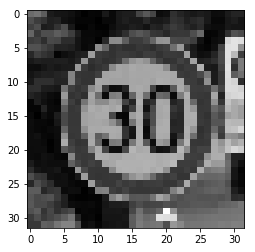

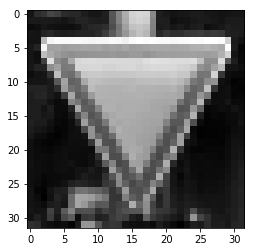

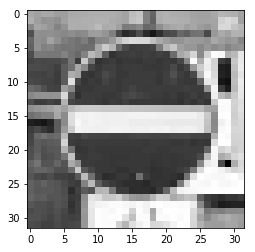

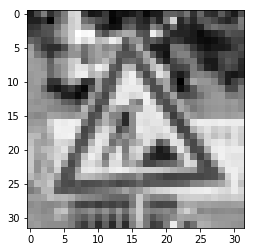

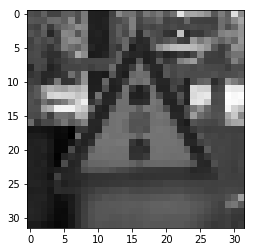

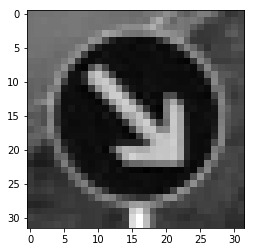

In [21]:
wild_gray = convert_gray(wild)
for image in wild_gray:
    plt.imshow(image, cmap='gray')
    plt.show()

In [22]:
X_wild = normalize(wild_gray)
X_wild = np.reshape(X_wild, (X_wild.shape[0], X_wild.shape[1], X_wild.shape[2], 1))

### Predict the Sign Type for Each Image

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')
    prediction = tf.argmax(tf.nn.softmax(logits),1)
    wild_predictions = sess.run(prediction, feed_dict={x: X_wild, keep_prob: 1.0})
    wild_softmax = sess.run(tf.nn.softmax(logits), feed_dict={x: X_wild, keep_prob: 1.0})
    print("Labels:     ", np.array(y_wild))
    print("Predictions:", wild_predictions)
    wild_accuracy = evaluate(X_wild, y_wild)
    print("Accuracy = {:.3f}".format(wild_accuracy))
    print()

INFO:tensorflow:Restoring parameters from ./lenet
Labels:      [ 1 13 17 25 26 38]
Predictions: [ 1 13 17 25 26 38]
Accuracy = 1.000



### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print(wild_predictions)
wild_accuracy_percent = np.sum(y_true == y_pred for y_true, y_pred in zip(y_wild, wild_predictions))/len(y_wild)*100
print("Accuracy: {}%".format(wild_accuracy_percent))

[ 1 13 17 25 26 38]
Accuracy: 100.0%


Accuracy is 100%, which is close to the 96% on the validation set and 94% on the test set. We have very few images, only 5 here. Also, the images are of very good condition. Some of the images in the train/valid/test set are quite difficult to classify, even for a human. If we had more images, and some more trickier ones like in the dataset I'd expect to see probabilities closer to that of the validation and test sets.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [25]:
with tf.Session() as sess:
    res = sess.run(tf.nn.top_k(tf.constant(wild_softmax), k=5))
    print(res)

TopKV2(values=array([[  1.00000000e+00,   2.28718040e-08,   6.85952545e-11,
          1.11062700e-12,   4.96197220e-14],
       [  9.99999642e-01,   3.66421602e-07,   1.51958349e-10,
          4.53232903e-11,   1.17679859e-11],
       [  1.00000000e+00,   2.70628036e-22,   3.48335732e-24,
          1.48456991e-25,   2.85569312e-26],
       [  1.00000000e+00,   1.69425357e-12,   1.32461425e-13,
          1.59967356e-14,   1.20910491e-15],
       [  7.97606230e-01,   2.00077027e-01,   2.26274459e-03,
          4.49248982e-05,   4.77592948e-06],
       [  9.99999404e-01,   6.18118463e-07,   1.96800990e-14,
          1.84696974e-14,   2.39388261e-15]], dtype=float32), indices=array([[ 1,  5,  2,  4,  6],
       [13, 12, 15,  5, 35],
       [17, 34, 38, 33, 26],
       [25, 22, 20, 24, 21],
       [26, 18, 25, 24, 11],
       [38, 39, 10, 31, 37]], dtype=int32))


The model is very certain about each of the predictions. Essentially 100% for each of the predictions.